### Récupération du jeu de données

In [5]:
#wget -c lists.tar -O - | tar -xz

import tarfile

annotation = tarfile.open('annotation.tar')
annotation.extractall('./annotation')
annotation.close()

images = tarfile.open('images.tar')
images.extractall('./images')
images.close()

lists = tarfile.open('lists.tar')
lists.extractall('./lists')
lists.close()

### Import des librairies

In [10]:
import os
import numpy as np
import random
import glob
import shutil
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf

### Chargement du fichier mat

In [16]:
import scipy.io as sp
train_data = sp.loadmat('train_data.mat')
#test_data.keys()
#test_data['test_info']
#test_data['test_info'].dtype
#test_data['test_info'][0,0]['file_list'][0,0]
#test_data['test_info'].size
#test_data['test_info'].shape
#test_data.values()

### Lecture des données

In [3]:
train_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_info', 'train_fg_data', 'train_data'])

In [4]:
type(train_data['train_fg_data']), train_data['train_fg_data'].shape

(numpy.ndarray, (12000, 5376))

In [5]:
type(train_data['train_info']), train_data['train_info'].shape

(numpy.ndarray, (1, 1))

In [6]:
type(train_data['train_data']), train_data['train_data'].shape

(numpy.ndarray, (12000, 12000))

In [7]:
train_data['train_info']

array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9333'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_2503'], dtype='<U44')]],
      dtype=object),

In [8]:
train_data['train_info'][0,0]['file_list'][0,0]

array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')

In [9]:
train_data['train_info'][0,0]['file_list'][0,0].item(0)

'n02085620-Chihuahua/n02085620_5927.jpg'

In [10]:
#conda install pillow

In [12]:
#imread(train_data['train_info'][0,0]['file_list'][0,0].item(0))

In [14]:
len(train_data['train_info'])

1

In [15]:
file_list = sp.loadmat('lists/file_list.mat')

In [16]:
file_list.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [17]:
len(file_list['file_list'])

20580

In [7]:
os.getcwd()

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso'

In [8]:
tf.__version__

'2.1.0'

In [9]:
#os.listdir()
#os.listdir('annotation')
imread('images/Images/n02085620-Chihuahua/n02085620_7.jpg')

array([[[190, 222, 125],
        [194, 226, 129],
        [195, 225, 127],
        ...,
        [202, 234, 159],
        [196, 228, 152],
        [195, 229, 152]],

       [[186, 217, 123],
        [190, 222, 125],
        [191, 221, 125],
        ...,
        [202, 233, 163],
        [195, 227, 154],
        [194, 228, 154]],

       [[186, 215, 122],
        [189, 218, 125],
        [189, 219, 123],
        ...,
        [202, 232, 168],
        [200, 230, 166],
        [199, 231, 164]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  8,   7,  21],
        [  9,   8,  22],
        [  7,   9,  22]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   6,  20],
        [ 11,  10,  24],
        [  9,  11,  24]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   4,  18],
        [ 12,  11,  25],
        [ 10,  12,  25]]

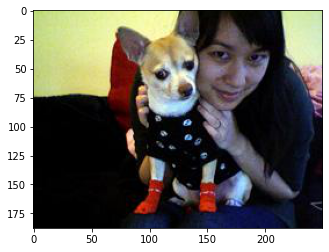

In [10]:
dog1 = imread('images/Images/n02085620-Chihuahua/n02085620_7.jpg')
plt.imshow(dog1)

In [11]:
os.getcwd()

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso'

In [92]:
path_source = 'C://Users/hp/DEEPLEARNING/tp_perso/tp_perso3/images/Images'
path_destination = 'C://Users/hp/DEEPLEARNING/tp_perso/tp_perso3/images/Images/data/breed'

In [19]:
os.chdir('images/Images')

In [20]:
os.getcwd()
##os.makedirs('data/breed')

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso\\tp_perso3\\images\\Images'

### Récupération des labels

In [21]:
mes_images = os.listdir(path_source)
len(mes_images)

122

In [22]:
labels = []
labels

[]

In [23]:
for i in range(len(mes_images)-1):
    #inner_folder = os.listdir(path_source+"/"+mes_images[i])
    i = i + 1
    mes_images[i] = mes_images[i][10:]
    name=mes_images[i]
    labels.append(name)
    print(name)

Chihuahua
Japanese_spaniel
Maltese_dog
Pekinese
Shih-Tzu
Blenheim_spaniel
papillon
toy_terrier
Rhodesian_ridgeback
Afghan_hound
basset
beagle
bloodhound
bluetick
black-and-tan_coonhound
Walker_hound
English_foxhound
redbone
borzoi
Irish_wolfhound
Italian_greyhound
whippet
Ibizan_hound
Norwegian_elkhound
otterhound
Saluki
Scottish_deerhound
Weimaraner
Staffordshire_bullterrier
American_Staffordshire_terrier
Bedlington_terrier
Border_terrier
Kerry_blue_terrier
Irish_terrier
Norfolk_terrier
Norwich_terrier
Yorkshire_terrier
wire-haired_fox_terrier
Lakeland_terrier
Sealyham_terrier
Airedale
cairn
Australian_terrier
Dandie_Dinmont
Boston_bull
miniature_schnauzer
giant_schnauzer
standard_schnauzer
Scotch_terrier
Tibetan_terrier
silky_terrier
soft-coated_wheaten_terrier
West_Highland_white_terrier
Lhasa
flat-coated_retriever
curly-coated_retriever
golden_retriever
Labrador_retriever
Chesapeake_Bay_retriever
German_short-haired_pointer
vizsla
English_setter
Irish_setter
Gordon_setter
Brittany_

In [24]:
labels

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'English_foxhound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'otterhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wire-haired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_wh

In [27]:
#os.getcwd()
##os.chdir('data/breed')
##os.makedirs('test')
##os.makedirs('train')
##os.makedirs('valid')

In [15]:
os.getcwd()
#os.chdir('../../../')
os.getcwd()
#os.listdir()

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso\\images\\Images'

In [29]:
#for i in random.sample(glob.glob('n02*'), 500):
#        shutil.move(i, path_destination+'/train/cat')      
#for i in random.sample(glob.glob('dog*'), 500):
#        shutil.move(i,path_destination+'/train/dog')
#for i in random.sample(glob.glob('cat*'), 100):
#        shutil.move(i,path_destination+'/valid/cat')        
#for i in random.sample(glob.glob('dog*'), 100):
#        shutil.move(i,path_destination+'/valid/dog')
#for i in random.sample(glob.glob('cat*'), 50):
#        shutil.move(i,  path_destination+'/test/cat')      
#for i in random.sample(glob.glob('dog*'), 50):
#        shutil.move(i,  path_destination+'/test/dog')
#os.chdir('../../')

In [25]:
mes_images = os.listdir(path_source)
len(mes_images)
#p = random.sample(glob.glob(path_source+"/*"),10)
#p

122

### Création des différents répertoires train, valid et test

In [17]:
for filepath in random.sample(glob.glob(path_source + "/n*/*"), 800):
    #print(filepath)
    try:
        os.makedirs(os.path.dirname('data/breed/train/'+os.path.relpath(filepath, path_source)),exist_ok=True)
    
        shutil.move(filepath, 'data/breed/train/' + os.path.relpath(filepath, path_source))
    except FileExistsError:
        pass

In [18]:
os.getcwd()

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso\\images\\Images'

In [19]:
for filepath in random.sample(glob.glob(path_source + "/n*/*"), 100):
    #print(filepath)
    try:
        os.makedirs(os.path.dirname('data/breed/valid/'+os.path.relpath(filepath, path_source)),exist_ok=True)
    
        shutil.move(filepath, 'data/breed/valid/' + os.path.relpath(filepath, path_source))
    except FileExistsError:
        pass

In [20]:
for filepath in random.sample(glob.glob(path_source + "/n*/*"), 40):
    #print(filepath)
    try:
        os.makedirs(os.path.dirname('data/breed/test/'+os.path.relpath(filepath, path_source)),exist_ok=True)
    
        shutil.move(filepath, 'data/breed/test/' + os.path.relpath(filepath, path_source))
    except FileExistsError:
        pass

## API image request

In [36]:
import requests
import urllib
response = requests.get("https://dog.ceo/api/breeds/image/random")
response
response.content
response.json()
print(f"{len(response.json()['message'])}")
random_image = response.json()['message']
random_image
urllib.request.urlretrieve(random_image, "random.jpg")
      
#file = open("test.jpg", "wb")
#file.write(random_image)
#file.close()

54


('random.jpg', <http.client.HTTPMessage at 0x1c721ece448>)

In [35]:
os.getcwd()

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso\\images\\Images'

In [252]:
#for i in range(10):
#    plt.subplot(4, 4, i+1)
#    for filename in glob.glob(path_source+'/n*-Chihuahua/n*'):
#        image = imread(filename)
#        plt.imshow(image)
#        plt.title(image.shape)

### Plot d'images

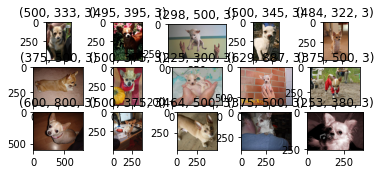

In [21]:
limit=16
index=0

for filename in glob.glob(path_source+'/n*-Chihuahua/n*'):
    index+=1
    if index==limit:
        break
    plt.subplot(5,5, index)
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)

## Image processing

In [27]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [28]:
os.getcwd()

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso\\tp_perso3\\images\\Images'

In [40]:
train_gen = train_datagen.flow_from_directory(
    path_destination+'/train/',
    target_size=(150,150),
    batch_size=10,
    class_mode="categorical"
)

train_samples = train_gen.samples
##from keras.utils.np_utils import to_categorical

##train_gen = train_datagen.flow_from_directory(
##    path_destination+'/train/',
##    target_size=(150,150),
##    batch_size=2,
##    class_mode="categorical"
##)

##num_classes = len(train_gen.class_indices)
##train_labels = train_gen.classes
# convert the training labels to categorical vectors
##train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 1600 images belonging to 120 classes.


In [49]:
val_gen = val_datagen.flow_from_directory(
    path_destination+'/valid/',
    target_size=(150,150),
    batch_size=10,
    class_mode="binary"
)

val_samples = val_gen.samples
##val_gen = val_datagen.flow_from_directory(
##    path_destination+'/valid/',
##    target_size=(150,150),
##    batch_size=2,
##    class_mode=None
##)

##validation_labels = val_gen.classes
##validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 100 images belonging to 66 classes.


In [50]:
train_samples

1600

In [51]:
type(val_gen)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [52]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [53]:
# Visualiser les images resizés et rescalés
imgs, labels = next(train_gen)
labels
imgs

array([[[[0.13333334, 0.18039216, 0.10196079],
         [0.43921572, 0.454902  , 0.39607847],
         [0.15686275, 0.17254902, 0.11764707],
         ...,
         [0.01176471, 0.08235294, 0.02745098],
         [0.454902  , 0.5254902 , 0.4784314 ],
         [0.02745098, 0.09803922, 0.00392157]],

        [[0.01960784, 0.0627451 , 0.        ],
         [0.0509804 , 0.06666667, 0.01176471],
         [0.13333334, 0.14117648, 0.08627451],
         ...,
         [0.7254902 , 0.79215693, 0.7686275 ],
         [0.18039216, 0.24313727, 0.20000002],
         [0.30588236, 0.48627454, 0.43529415]],

        [[0.06666667, 0.10588236, 0.07058824],
         [0.29803923, 0.30980393, 0.26666668],
         [0.13333334, 0.14117648, 0.08627451],
         ...,
         [0.77647066, 0.8352942 , 0.854902  ],
         [0.227451  , 0.28627452, 0.25882354],
         [0.14901961, 0.3137255 , 0.227451  ]],

        ...,

        [[0.14901961, 0.16862746, 0.14117648],
         [0.16862746, 0.18039216, 0.15294118]

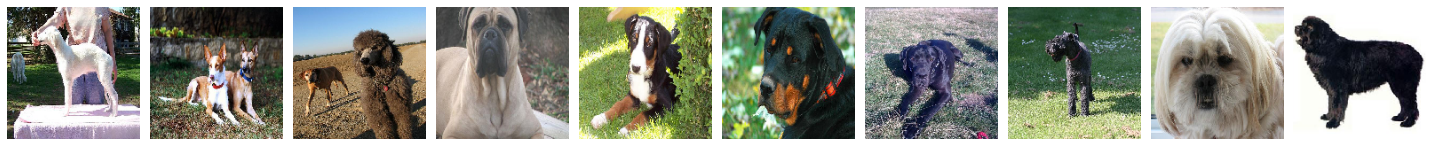

In [54]:
plotImages(imgs)

In [55]:
print(labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=path_destination+'/train/', target_size=(224,224), class_mode='categorical', batch_size=10)
#train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#    .flow_from_directory(directory=path_destination+'/train/', target_size=(224,224), class_mode='categorical', batch_size=10)

Found 1600 images belonging to 120 classes.


In [58]:
# Visualiser les images resizés et rescalés
imgs, labels = next(train_gen)
labels
imgs

array([[[[0.08627451, 0.06666667, 0.04313726],
         [0.1254902 , 0.10588236, 0.08235294],
         [0.10196079, 0.09019608, 0.05490196],
         ...,
         [0.52156866, 0.54901963, 0.28627452],
         [0.3803922 , 0.4039216 , 0.16862746],
         [0.30980393, 0.32941177, 0.11764707]],

        [[0.12156864, 0.10196079, 0.07843138],
         [0.0627451 , 0.0509804 , 0.01568628],
         [0.10980393, 0.10980393, 0.07058824],
         ...,
         [0.5176471 , 0.54901963, 0.24705884],
         [0.61960787, 0.64705884, 0.37254903],
         [0.6       , 0.62352943, 0.37254903]],

        [[0.05882353, 0.04705883, 0.01176471],
         [0.09019608, 0.09019608, 0.0509804 ],
         [0.08235294, 0.08235294, 0.03529412],
         ...,
         [0.5411765 , 0.5803922 , 0.2392157 ],
         [0.5803922 , 0.6156863 , 0.29803923],
         [0.34117648, 0.37254903, 0.07843138]],

        ...,

        [[0.6666667 , 0.6901961 , 0.454902  ],
         [0.7176471 , 0.7411765 , 0.5058824 ]

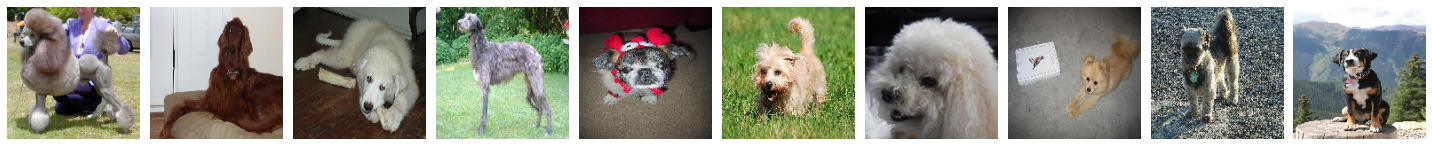

In [59]:
plotImages(imgs)

# Construction du CNN

In [60]:
# Ds le cadre du df data2 : x1, x2 comme features
# inputs = tf.keras.layers.Input(shape=(2, ))

In [62]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [63]:
#model.compile(loss='binary_crossentropy', metrics=['acc'], 
#              optimizer='rmsprop')
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

### Fit le model

In [66]:
# steps_per_epoch= training_samples//batch_size = 160
# validation_steps=test_samples//batch_size = 10
history = model.fit(train_gen, epochs=50, steps_per_epoch=160, 
                   validation_data=val_gen, validation_steps=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 160 steps, validate for 10 steps
Epoch 1/50
160/160 [==============================] - 23s 142ms/step - loss: 1.1921e-07 - acc: 0.0114 - val_loss: 3.9315e-06 - val_acc: 0.0200
Epoch 2/50
160/160 [==============================] - 22s 140ms/step - loss: 1.1921e-07 - acc: 0.0114 - val_loss: 3.9315e-06 - val_acc: 0.0200
Epoch 3/50
160/160 [==============================] - 23s 141ms/step - loss: 1.1921e-07 - acc: 0.0114 - val_loss: 3.9315e-06 - val_acc: 0.0200
Epoch 4/50
160/160 [==============================] - 22s 141ms/step - loss: 1.1921e-07 - acc: 0.0114 - val_loss: 3.9315e-06 - val_acc: 0.0200
Epoch 5/50
160/160 [==============================] - 22s 140ms/step - loss: 1.1921e-07 - acc: 0.0114 - val_loss: 3.9315e-06 - val_acc: 0.0200
Epoch 6/50
160/160 [==============================] - 23s 142ms/step - loss: 1.1921e-07 - acc: 0.0114 - val_loss: 3.9315e-06 - val_acc: 0.0200
Epoch 7/50
160/160 [=============================

Text(0.5, 1.0, 'Training and validation loss')

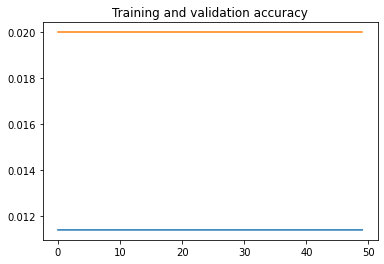

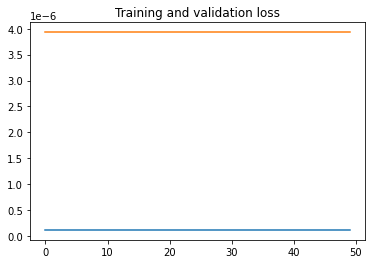

In [67]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Lutter contre le surapprentissage
## Data augmentation

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen

In [69]:
os.getcwd()

'C:\\Users\\hp\\DEEPLEARNING\\tp_perso\\tp_perso3\\images\\Images'

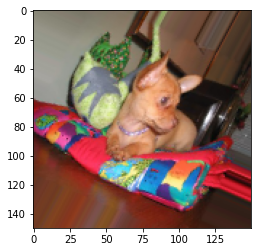

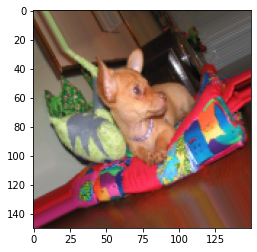

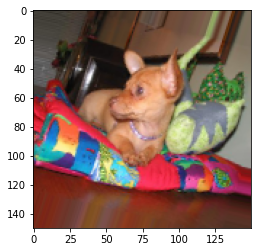

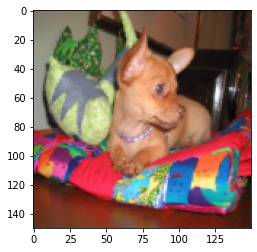

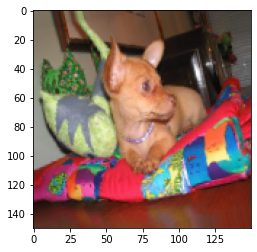

In [71]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img('data/breed/train/n02085620-Chihuahua/n02085620_3110.jpg', target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [72]:
cnn = tf.keras.models.Sequential()

In [73]:
cnn.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)))

In [74]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [75]:
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [76]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [77]:
cnn.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [78]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [79]:
cnn.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [80]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
____________________________________________________

In [81]:
cnn.add(tf.keras.layers.Flatten())

In [82]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0

In [83]:
cnn.add(tf.keras.layers.Dense(512, activation='relu'))

In [84]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0

In [85]:
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [86]:
(18496 * 512) + 512

9470464

In [87]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0

In [88]:
cnn.get_weights()

[array([[[[-0.11235853,  0.1563887 ,  0.00832964, -0.00397563,
           -0.12517497,  0.0326709 ,  0.05780798,  0.12966275,
            0.13462171,  0.0662919 ,  0.17879677,  0.06794989,
           -0.06801076, -0.02335408,  0.0446012 ,  0.1584099 ],
          [-0.12452862,  0.14673856,  0.08361813,  0.00658354,
           -0.04263537,  0.1446481 ,  0.0168387 , -0.15542053,
           -0.15936776, -0.18066378,  0.1357947 , -0.08881513,
            0.03462656,  0.11781555,  0.148637  , -0.11384708],
          [-0.114621  , -0.17376445, -0.12258194,  0.12510508,
           -0.06008443, -0.06236209,  0.15847021,  0.15750062,
            0.12220874, -0.08625692,  0.1574702 ,  0.08535814,
           -0.17344874,  0.13479638,  0.09983411, -0.05000117]],
 
         [[ 0.12718931, -0.02148566, -0.08885818, -0.1771009 ,
            0.14801645,  0.17234856,  0.10081917, -0.00700562,
            0.06280091, -0.05634037,  0.06277823,  0.09647042,
            0.14298767, -0.13706812,  0.13355568,

In [93]:
os.path.dirname(path_destination)
#os.path.relpath(path_destination)

'C://Users/hp/DEEPLEARNING/tp_perso/tp_perso3/images/Images/data'

### Construction

In [95]:
DIR_DATA = 'C://Users/hp/DEEPLEARNING/tp_perso/tp_perso3/images/Images'
IMG_SIZE = 150
NUM_CLASES = 120
#BATCH_SIZE = 1024
BATCH_SIZE = 10
EPOCHS = 5

In [96]:
from tensorflow.keras.optimizers import Adam

In [100]:
inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.GlobalAveragePooling2D()(inputs)


x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(NUM_CLASES, activation='softmax')(x)

# Coupling the base model with the custom Architecture
model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 3)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              263168    
_________________________________________________________________
dense_12 (Dense)             (None, 120)               123000    
Total params: 387,192
Trainable params: 387,192
Non-trainable params: 0
_____________________________________________________

In [102]:
# Train model
batch_size=BATCH_SIZE
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    steps_per_epoch= 160,
    workers=12,
    verbose=1,
    shuffle=True,
    validation_data=val_gen,
    validation_steps=10
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 160 steps, validate for 10 steps
Epoch 1/5
160/160 [==============================] - 5s 30ms/step - loss: 4.7924 - accuracy: 0.0050 - val_loss: 18956.0259 - val_accuracy: 0.0000e+00
Epoch 2/5
160/160 [==============================] - 4s 23ms/step - loss: 4.7712 - accuracy: 0.0150 - val_loss: 19000.1541 - val_accuracy: 0.0000e+00
Epoch 3/5
160/160 [==============================] - 4s 23ms/step - loss: 4.7611 - accuracy: 0.0144 - val_loss: 19032.9773 - val_accuracy: 0.0000e+00
Epoch 4/5
160/160 [==============================] - 4s 23ms/step - loss: 4.7469 - accuracy: 0.0162 - val_loss: 19103.0768 - val_accuracy: 0.0000e+00
Epoch 5/5
160/160 [==============================] - 4s 23ms/step - loss: 4.7307 - accuracy: 0.0200 - val_loss: 19238.7609 - val_accuracy: 0.0000e+00


In [ ]:
# A modifier
#mes_images = os.listdir('images/Images')
mes_images = os.listdir()
for item in mes_images:
    if item.startswith('n02'):
        #os.chdir('data/breed/train')
        os.makedirs(path_destination+'/test/'+item)
        os.makedirs(path_destination+'/train/'+item)
        os.makedirs(path_destination+'/valid/'+item)
    else:
        print("mistake")
    #if item.startswith('n02'):
    #    d = item.startswith('n02')
    #    os.chdir('data/breed/train')
    #    os.makedirs(d)
        #imread(d+'')
    #    print('Chihuahua')
    #else:
    #    print('another breed')
# 150 images minimum par dossier(?)

## Processing the Data

In [ ]:
batch_size = 10
classes = ['Chihuahua','Japanese_spaniel','Maltese_dog','Pekinese','Shih-Tzu','Blenheim_spaniel','papillon','toy_terrier','Rhodesian_ridgeback','Afghan_hound','basset','beagle','bloodhound','bluetick','black-and-tan_coonhound','Walker_hound','English_foxhound','redbone','borzoi','Irish_wolfhound','Italian_greyhound','whippet','Ibizan_hound','Norwegian_elkhound','otterhound','Saluki','Scottish_deerhound','Weimaraner','Staffordshire_bullterrier','American_Staffordshire_terrier','Bedlington_terrier','Border_terrier','Kerry_blue_terrier','Irish_terrier']
target_size = (224,224)

# Enrégistrer le modèle
keras.models.save_model(model,'mask_model.h5')

# La fonction de prédiction
def make_predictions(path) :
    l=['Cats','Dogs']
    print('The masked image is :')
    arr=make_mask(path,print_plot=True)
    arr=np.array(arr)
    arr=arr.reshape(1,150,150)
    clas=np.argmax(model.predict(arr),axis=-1)
    print(l[clas[0]])
    
# Prédiction    
make_predictions('../input/dogs-cats-images/dataset/test_set/dogs/dog.4005.jpg')